In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Creating 5-85 directories in val and train folder

import os.path
from os import path

i=5

while(i<86):
  # Do the same for /val/
  my_path='drive/MyDrive/UTK/YOLOv8_test_root/train/'
  path = os.path.join(my_path, str(i))
  os.mkdir(path)
  i+=1

https://wandb.ai/moritzm00/UTKFace-Age-Regression/reports/Age-Estimation-on-the-UTKFace-Dataset--Vmlldzo0MzE3MjE3

In [ ]:
#Pruning all the images with age>85 and age<5
import os
import re
import random
import shutil

# Directory containing the images
dir_path = 'drive/MyDrive/UTK/YOLOv8_test_root/UTKFace'

# Loop over all files in the directory
for filename in os.listdir(dir_path):
    # Check if file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Get the first number in the filename
        first_number = int(re.match(r'\d+', filename).group())
        if first_number > 85 or first_number < 5:
            os.remove(os.path.join(dir_path, filename))

#Dividing train and val and move files to particular directiories
source_dir = 'drive/MyDrive/UTK/YOLOv8_test_root/UTKFace'
train_dir='drive/MyDrive/UTK/YOLOv8_test_root/train'
val_dir='drive/MyDrive/UTK/YOLOv8_test_root/val'

# The fraction of images to use for validation
val_fraction = 0.1

# Get a list of all image filenames
filenames = os.listdir(source_dir)

# Randomly shuffle the filenames
random.shuffle(filenames)

# Calculate the number of validation samples
val_samples = int(len(filenames) * val_fraction)

# Split the filenames into training and validation sets
val_filenames = filenames[:val_samples]
train_filenames = filenames[val_samples:]

# Move the files
for filename in train_filenames:
    shutil.move(os.path.join(source_dir, filename),
                os.path.join(train_dir, filename))

for filename in val_filenames:
    shutil.move(os.path.join(source_dir, filename),
                os.path.join(val_dir, filename))

In [ ]:
#Move files yo coressponding directories
import shutil
import os

image_directory = 'drive/MyDrive/UTK/YOLOv8_test_root/train'

# Iterate through each file in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg.chip.jpg'):
        # Extract the number from the filename
        number = filename.split('_')[0]

        # Move the file to the corresponding folder
        source_path = os.path.join(image_directory, filename)
        destination_path = os.path.join(image_directory, number, filename)
        shutil.move(source_path, destination_path)

In [ ]:
#Checking if structure of files is right
import os
source_dir = 'drive/MyDrive/UTK/UTKFace/'
train_dir='drive/MyDrive/UTK/YOLOv8_test_root/train'
val_dir='drive/MyDrive/UTK/YOLOv8_test_root/val/'

# Get a list of all image filenames
filenames = os.listdir(train_dir)

#check if all files are there
print(filenames)

['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85']


In [ ]:
DATA_DIR = 'drive/MyDrive/UTK/YOLOv8_test_root/'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
#resizing to 224 x 224 (needs to be changed, it's overcomplicated, as preprocessing should be done before ordering into folders)
from PIL import Image
import os

# Specify the directory containing folders 5, 6, 7, ..., 85
base_directory = 'drive/MyDrive/UTK/YOLOv8_test_root/val'  # Replace with the actual path

# Specify the target size
target_size = (224, 224)

# Function to resize images in a directory
def resize_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg.chip.jpg'):  # Adjust the file extension as needed
            filepath = os.path.join(directory, filename)
            try:
                img = Image.open(filepath)
                resized_img = img.resize(target_size, Image.ANTIALIAS)
                resized_img.save(filepath)
                print(f"Resized {filename}")
            except Exception as e:
                print(f"Error resizing {filename}: {str(e)}")

# Iterate through folders 5, 6, 7, ..., 85
for folder_number in range(5, 85):
    folder_path = os.path.join(base_directory, str(folder_number))
    if os.path.exists(folder_path):
        resize_images_in_directory(folder_path)
    else:
        print(f"Folder {folder_number} not found.")

print("Image resizing completed.")


<ipython-input-9-7ffe7dd2b2d6>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


Resized 78_1_0_20170110180142396.jpg.chip.jpg
Resized 78_0_0_20170111171747679.jpg.chip.jpg
Resized 78_1_1_20170113011857601.jpg.chip.jpg
Resized 79_0_0_20170111223823788.jpg.chip.jpg
Image resizing completed.


In [ ]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
results = model.train(data=DATA_DIR, epochs=20, imgsz=224)  # train the model

100%|██████████| 5.28M/5.28M [00:00<00:00, 138MB/s]


Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=drive/MyDrive/UTK/YOLOv8_test_root/, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

100%|██████████| 6.23M/6.23M [00:00<00:00, 195MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/UTK/YOLOv8_test_root/train... 19133 images, 0 corrupt: 100%|██████████| 19133/19133 [00:00<?, ?it/s]


albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/drive/MyDrive/UTK/YOLOv8_test_root/val... 2127 images, 0 corrupt: 100%|██████████| 2127/2127 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.512G      4.447         16        224:   1%|          | 7/1196 [00:07<12:27,  1.59it/s]


100%|██████████| 755k/755k [00:00<00:00, 35.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [01:43<00:00,  1.55s/it]

                   all      0.115      0.351



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 30.87it/s]

                   all      0.116      0.371



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 30.90it/s]

                   all      0.134      0.395



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.54it/s]

                   all      0.134      0.416



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.05it/s]

                   all      0.149      0.418



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.99it/s]

                   all      0.149      0.433



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.18it/s]

                   all      0.152      0.443



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.15it/s]

                   all       0.15      0.431



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.49it/s]

                   all      0.149      0.454



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.516G      2.858         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 30.86it/s]

                   all      0.149      0.437



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.516G      2.807         13        224: 100%|██████████| 1196/1196 [00:44<00:00, 27.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.36it/s]

                   all      0.144      0.441



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.516G      2.752         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 30.13it/s]

                   all      0.146      0.449



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.516G      2.692         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.40it/s]

                   all      0.145      0.447



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.516G      2.634         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.72it/s]

                   all      0.145      0.441



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.516G      2.568         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.41it/s]

                   all      0.141      0.435



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.516G      2.509         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 28.30it/s]

                   all      0.153      0.436



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.516G      2.456         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 31.23it/s]

                   all      0.137      0.437



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.516G      2.396         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.93it/s]

                   all      0.144      0.435



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.516G      2.349         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 29.65it/s]

                   all      0.145      0.439



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.516G      2.306         13        224: 100%|██████████| 1196/1196 [00:43<00:00, 27.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 30.94it/s]

                   all       0.14      0.436



20 epochs completed in 0.584 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n-cls summary (fused): 73 layers, 1538641 parameters, 0 gradients, 3.4 GFLOPs
train: /content/drive/MyDrive/UTK/YOLOv8_test_root/train... found 19133 images in 81 classes ✅ 
val: /content/drive/MyDrive/UTK/YOLOv8_test_root/val... found 2127 images in 81 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:02<00:00, 25.75it/s]


                   all      0.149      0.452
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
!scp -r /content/runs 'drive/MyDrive/UTK/'

In [ ]:
!ls 'drive/MyDrive/UTK/runs/classify/train'

args.yaml					    train_batch11960.jpg   val_batch1_labels.jpg
confusion_matrix_normalized.png			    train_batch11961.jpg   val_batch1_pred.jpg
confusion_matrix.png				    train_batch11962.jpg   val_batch2_labels.jpg
events.out.tfevents.1700815424.89ca53622ca1.2613.0  train_batch1.jpg	   val_batch2_pred.jpg
results.csv					    train_batch2.jpg	   weights
results.png					    val_batch0_labels.jpg
train_batch0.jpg				    val_batch0_pred.jpg


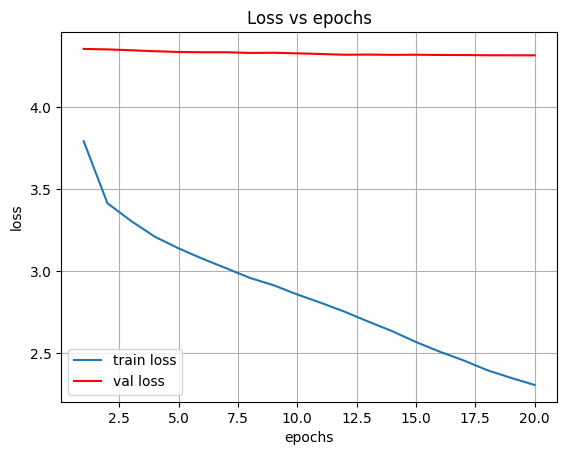

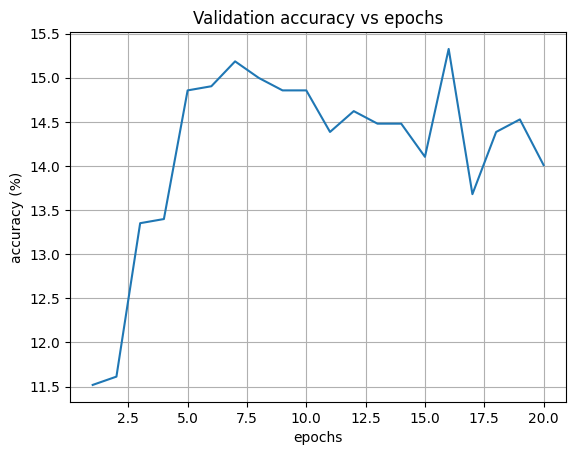

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_path = 'drive/MyDrive/UTK/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [ ]:
from ultralytics import YOLO

import numpy as np


model = YOLO('drive/MyDrive/UTK/runs/classify/train/weights/last.pt')  # load a custom model

results = model('drive/MyDrive/UTK/19_Olivia.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/drive/MyDrive/UTK/19_Olivia.jpg: 224x224 18 0.49, 15 0.08, 75 0.04, 16 0.03, 14 0.03, 5.8ms
Speed: 2.0ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
{0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '16', 7: '17', 8: '18', 9: '19', 10: '20', 11: '21', 12: '22', 13: '23', 14: '24', 15: '25', 16: '26', 17: '27', 18: '28', 19: '29', 20: '30', 21: '31', 22: '32', 23: '33', 24: '34', 25: '35', 26: '36', 27: '37', 28: '38', 29: '39', 30: '40', 31: '41', 32: '42', 33: '43', 34: '44', 35: '45', 36: '46', 37: '47', 38: '48', 39: '49', 40: '5', 41: '50', 42: '51', 43: '52', 44: '53', 45: '54', 46: '55', 47: '56', 48: '57', 49: '58', 50: '59', 51: '6', 52: '60', 53: '61', 54: '62', 55: '63', 56: '64', 57: '65', 58: '66', 59: '67', 60: '68', 61: '69', 62: '7', 63: '70', 64: '71', 65: '72', 66: '73', 67: '74', 68: '75', 69: '76', 70: '77', 71: '78', 72: '79', 73: '8', 74: '80', 75: '81', 76: '82', 77: '83', 78: '84', 79: '85', 80: '

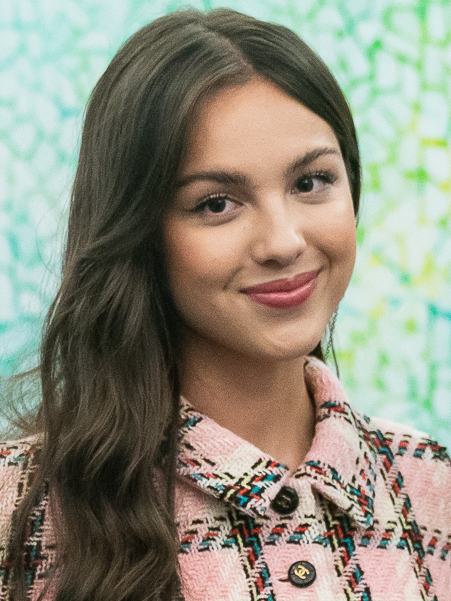**pogrubiony tekst**